# PPMS 

## .datファイルを.csvに変換、編集
### ファイル名：20210107, Ni-SUS PICT, ch1_700, ch2_, ch3_900.dat

In [2]:
import re
import csv

#データの読み込み、csvファイルに書き込み
def data_read(path, mode, filename, contents):
    with open(path, mode) as f1:
        with open(filename, 'a', newline="") as f2:
            row = f1.readline()
            writer = csv.writer(f2)
            t = 1
            while row:
                if t > 31:
                    if contents:
                        print("number:"+str(t))
                        print("---- Row data ----")
                        print("Type of ""data"":{}".format(type(row)))
                        print(row)
                    
                    s = row.split(',')
                    if contents:
                        print("配列の個数"+str(len(s)))
                    writer.writerow(s[0:22])
                row = f1.readline()
                t = t + 1
        
#ファイル名の設定、csvファイル作成
def data_create(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    filename = 'PPMS_Data_Edited/'+name[len(name)-1]+'.csv'
    with open(filename, 'w') as f:
        f.write('')
        print(name[len(name)-1] + ' was created!')
        print(filename)
    return filename

if __name__=="__main__":
    path = 'Data/filename.dat'
    mode = "r"
    filename = data_create(path)
    data_read(path, mode, filename, False)

20210107, Ni-SUS PICT, ch1_700, ch2_, ch3_900 was created!
PPMS_Data_Edited/20210107, Ni-SUS PICT, ch1_700, ch2_, ch3_900.csv



### 抵抗率と温度依存性
#### 仮グラフ作成

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 10

df = pd.read_csv('PPMS_Data_Edited/filename.csv', header = 0)
df.columns.values.tolist()

['Comment',
 'Time Stamp (sec)',
 'Status (code)',
 'Temperature (K)',
 'Magnetic Field (Oe)',
 'Sample Position (deg)',
 'Bridge 1 Resistivity (Ohm-m)',
 'Bridge 1 Excitation (uA)',
 'Bridge 2 Resistivity (Ohm-m)',
 'Bridge 2 Excitation (uA)',
 'Bridge 3 Resistivity (Ohm-m)',
 'Bridge 3 Excitation (uA)',
 'Bridge 4 Resistivity (Ohm-m)',
 'Bridge 4 Excitation (uA)',
 'Bridge 1 Std. Dev. (Ohm-m)',
 'Bridge 2 Std. Dev. (Ohm-m)',
 'Bridge 3 Std. Dev. (Ohm-m)',
 'Bridge 4 Std. Dev. (Ohm-m)',
 'Number of Readings',
 'Bridge 1 Resistance (Ohms)',
 'Bridge 2 Resistance (Ohms)',
 'Bridge 3 Resistance (Ohms)']

[[1.33086457e-06]]
[0.0009175]


C:\Users\banaj\Miniconda3\envs\py01_program\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


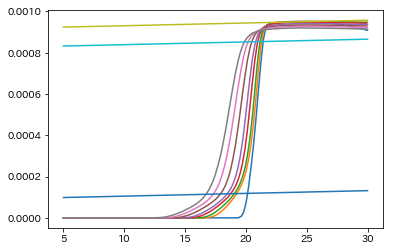

In [8]:
from sklearn.linear_model import LinearRegression

T = [0, 0.5, 1, 2, 3, 5, 7, 9]
a = 0.71766667*0.1
b = 1.8*0.1
l = 1.39666667*0.1

trans = float(a*b/l*1000)

df = df.loc[: ,'Temperature (K)': 'Bridge 3 Excitation (uA)']

#直線の式を求める
data = pd.DataFrame()
data = df[(df['Magnetic Field (Oe)'] < 0.108) & (df['Magnetic Field (Oe)'] > 0.106) & (df['Temperature (K)'] < 26) & (df['Temperature (K)'] > 22)]
model = LinearRegression(fit_intercept = True)
lm = model.fit(data[['Temperature (K)']], data[['Bridge 3 Resistivity (Ohm-m)']]*trans)
print(model.coef_)
print(model.intercept_)

t = np.arange(5, 30, 0.01)

#範囲を絞る
for i in range(8):
    exec(f"df_rho_{i} = pd.DataFrame()")
df_rho_0 = df[((df['Magnetic Field (Oe)'] < 0.108) & (df['Magnetic Field (Oe)'] > 0.106) & (df['Temperature (K)'] < 30) & (df['Temperature (K)'] > 6))]
df_rho_1 = df[(df['Magnetic Field (Oe)'] < 6000) & (df['Magnetic Field (Oe)'] > 4000)]
df_rho_2 = df[(df['Magnetic Field (Oe)'] < 11000) & (df['Magnetic Field (Oe)'] > 9000)]
df_rho_3 = df[(df['Magnetic Field (Oe)'] < 21000) & (df['Magnetic Field (Oe)'] > 19000)]
df_rho_4 = df[(df['Magnetic Field (Oe)'] < 31000) & (df['Magnetic Field (Oe)'] > 29000)]
df_rho_5 = df[(df['Magnetic Field (Oe)'] < 51000) & (df['Magnetic Field (Oe)'] > 49000)]
df_rho_6 = df[(df['Magnetic Field (Oe)'] < 71000) & (df['Magnetic Field (Oe)'] > 69000)]
df_rho_7 = df[(df['Magnetic Field (Oe)'] < 91000) & (df['Magnetic Field (Oe)'] > 89000)]

#csvに保存
df_rho = pd.DataFrame()
for i in range(8):
    exec(f"df_rho = df_rho_{i}.copy()")
    exec(f"df_rho['Bridge 3 Resistivity (Ohm-m)'] = df_rho_{i}['Bridge 3 Resistivity (Ohm-m)']*trans")
    #exec(f"df_rho.to_csv('PPMS_Result/No 2 900 48h '+str(T[i])+'T.csv', header=True, index=False, columns=['Temperature (K)', 'Bridge 3 Resistivity (Ohm-m)'])")

df_rho_all = df[((df['Magnetic Field (Oe)'] < 0.108) & (df['Magnetic Field (Oe)'] > 0.106))]
df_rho_all['Bridge 3 Resistivity (Ohm-m)'] = df_rho_all['Bridge 3 Resistivity (Ohm-m)']*trans
#df_rho_all.to_csv('PPMS_Result/900 48h PPMS 0Tall.csv', header=True, index=False, columns=['Temperature (K)', 'Bridge 3 Resistivity (Ohm-m)'])
#仮グラフをプロット
for i in range(8):
    exec(f"plt.plot(df_rho_{i}['Temperature (K)'], df_rho_{i}['Bridge 3 Resistivity (Ohm-m)']*trans)")
plt.plot(t, float(model.coef_)*t+float(model.intercept_)) 
plt.plot(t, float(model.coef_)*t+float(model.intercept_)*0.9) 
plt.plot(t, float(model.coef_)*t+float(model.intercept_)*0.1) 


### $H_{c2}$、$H_{irr}$を求める。

In [9]:
from sympy.geometry import *

df_p = pd.DataFrame()
df_Hc2 = pd.DataFrame()
df_Hirr = pd.DataFrame()

df_Hc2 = df.iloc[:0][['Magnetic Field (Oe)', 'Temperature (K)',]]
df_Hirr = df.iloc[:0][['Magnetic Field (Oe)', 'Temperature (K)',]]

#H_c2を求める
for i in range(8):
    for j in range(len(df_rho_0)):
        exec(f"df_p = df_rho_{i}.iloc[[j, j+1]][['Temperature (K)', 'Bridge 3 Resistivity (Ohm-m)', 'Magnetic Field (Oe)']]")
        x1, x2, y1, y2 = df_p.iloc[0,0], df_p.iloc[1,0], df_p.iloc[0,1]*trans, df_p.iloc[1,1]*trans
        y3 = float(model.coef_)*x1+float(model.intercept_)*0.9
        y4 = float(model.coef_)*x2+float(model.intercept_)*0.9
        tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x1)
        td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x2)
        if tc*td<0:
            break
    s1 = Segment((x1, y1),(x2,y2)) 
    s2 = Segment((x1, y3),(x2,y3))
    result = s1.intersection(s2)
    df_Hc2.loc[i] = [df_p.iloc[0,2], float(result[0].x)]
df_Hc2 = df_Hc2.round({"Magnetic Field (Oe)": -2})
print(df_Hc2)
df_Hc2.to_csv('PPMS_Result/No 2 900 48h Hc2.csv', header=True, index=False)

#H_irrを求める
for i in range(8):
    for j in range(len(df_rho_0)):
        exec(f"df_p = df_rho_{i}.iloc[[j, j+1]][['Temperature (K)', 'Bridge 3 Resistivity (Ohm-m)', 'Magnetic Field (Oe)']]")
        x1, x2, y1, y2 = df_p.iloc[0,0], df_p.iloc[1,0], df_p.iloc[0,1]*trans, df_p.iloc[1,1]*trans
        y3 = float(model.coef_)*x1+float(model.intercept_)*0.1
        y4 = float(model.coef_)*x2+float(model.intercept_)*0.1
        tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x1)
        td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x2)
        if tc*td<0:
            break
    s1 = Segment((x1, y1),(x2,y2)) 
    s2 = Segment((x1, y3),(x2,y3))
    result = s1.intersection(s2)
    df_Hirr.loc[i] = [df_p.iloc[0,2], float(result[0].x)]
df_Hirr = df_Hirr.round({"Magnetic Field (Oe)": -2})
print(df_Hirr)
df_Hirr.to_csv('PPMS_Result/No 2 900 48h Hirr.csv', header=True, index=False)

   Magnetic Field (Oe)  Temperature (K)
0                  0.0        21.409450
1               5000.0        21.290112
2              10000.0        21.168637
3              20000.0        20.971291
4              30000.0        20.804226
5              50000.0        20.482125
6              70000.0        20.176212
7              90000.0        19.872641
   Magnetic Field (Oe)  Temperature (K)
0                  0.0        20.129081
1               5000.0        19.240015
2              10000.0        19.042999
3              20000.0        18.741378
4              30000.0        18.453144
5              50000.0        17.897333
6              70000.0        17.312202
7              90000.0        16.715897


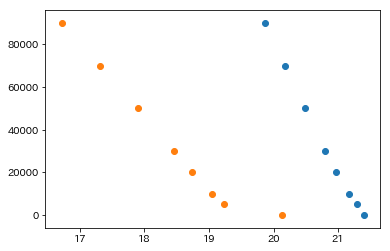

In [10]:
plt.scatter(df_Hc2["Temperature (K)"], df_Hc2["Magnetic Field (Oe)"])
plt.scatter(df_Hirr["Temperature (K)"], df_Hirr["Magnetic Field (Oe)"])

### $H_{c2}$の解析

In [11]:
df_Results = pd.DataFrame(columns = ['回帰統計'])
model = LinearRegression(fit_intercept = True)
df_Hc2["Magnetic Field (Oe)"] = df_Hc2["Magnetic Field (Oe)"]/10000
lm = model.fit(df_Hc2[["Temperature (K)"]], df_Hc2[["Magnetic Field (Oe)"]])
df_Hc2['予測値'] = df_Hc2["Temperature (K)"]*float(model.coef_)+[float(model.intercept_)]
df_Hc2['残差'] = df_Hc2['予測値']-df_Hc2["Magnetic Field (Oe)"]
df_Hc2['Temperature (K)^2'] = df_Hc2["Temperature (K)"]*df_Hc2["Temperature (K)"]
s_s = df_Hc2['残差'].var()
s_x = df_Hc2['Temperature (K)'].var(ddof = 0)*(len(df_Hc2)-1)
sum_x2 = df_Hc2["Temperature (K)^2"].sum()
df_Results.loc['切片'] = [float(model.intercept_)]
df_Results.loc['傾き'] = [float(model.coef_)]
r2 = model.score(df_Hc2[["Temperature (K)"]], df_Hc2[["Magnetic Field (Oe)"]])
df_Results.loc['決定係数'] = [r2]
s_y = df_Hc2["Magnetic Field (Oe)"].var()*(len(df_Hc2)-1)
df_Results.loc['被説明変数の偏差平方和'] = [s_y]
e2 = (1 - r2)*s_y
df_Results.loc['標準偏差'] = [e2]
error = e2/(len(df_Hc2)-2)
error = np.sqrt(error)
df_Results.loc['標準誤差'] = [error]
df_Results.loc['傾きの標準誤差'] = [np.sqrt(s_s/s_x)]
df_Results.loc['切片の標準誤差'] = [np.sqrt(s_s/s_x*sum_x2/len(df_Hc2))]
print(df_Results)
df_Results.to_csv('PPMS_Result/No 2 900 48h Hc2 coef.csv', header=True, index=True)
df_Hc2["Magnetic Field (Oe)"] = df_Hc2["Magnetic Field (Oe)"]*10000

                   回帰統計
切片           126.447487
傾き            -5.921960
決定係数           0.995359
被説明変数の偏差平方和   74.718750
標準偏差           0.346740
標準誤差           0.240396
傾きの標準誤差        0.163384
切片の標準誤差        3.394831


#### 本グラフ作成

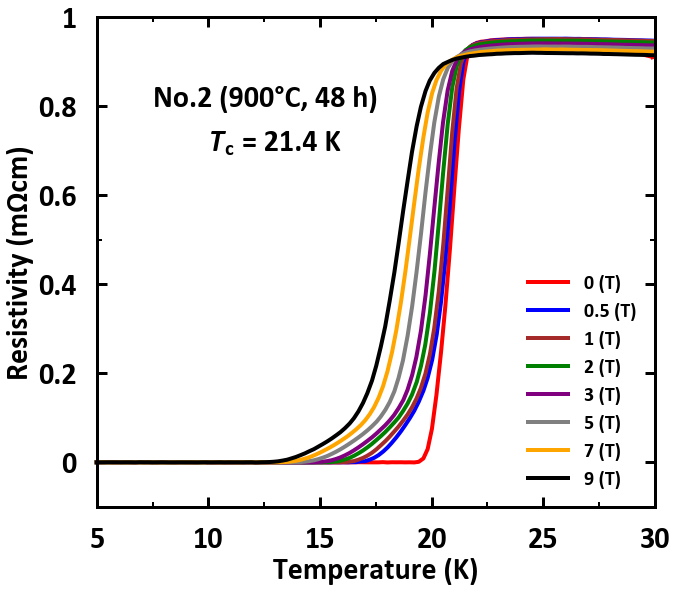

In [22]:
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')
f_Calibrib = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibrib.ttf')
f_Calibriz = FontProperties(fname=r'C:\WINDOWS\Fonts\calibriz.ttf')

#色設定
col = ['red', 'blue', 'brown', 'green', 'purple', 'gray', 'orange', 'black']

#凡例
labels = ['0 (T)', '0.5 (T)', '1 (T)', '2 (T)', '3 (T)', '5 (T)', '7 (T)', '9 (T)']

#画像の名前
def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'PPMS_Result/'+name[len(name)-1]+'.png'

#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(5, 30)
ax1.set_xticks(np.arange(5, 30+1, 5))
ax1.set_xticklabels(np.arange(5, 30+1, 5), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'Temperature (K)', fontproperties = f_Calibrib, fontsize = 30, fontweight='bold', fontstyle='italic')

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))

#y軸の目盛りの設定
ax1.set_ylim(-0.0001, 0.001)
ax1.set_yticks(np.arange(0, 0.0011, 0.0002))
ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontproperties = f_Calibrib, fontsize = 30)
ax1.set_ylabel(ylabel = 'Resistivity (mΩcm)', fontproperties = f_Calibrib, fontsize = 30)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))

#プロット
for i in range(8):
    exec(f"ax1.plot(df_rho_{i}['Temperature (K)'], df_rho_{i}['Bridge 3 Resistivity (Ohm-m)']*trans ,color = col[i], label = labels[i], marker = '.', markersize = '0', linewidth = 4, clip_on = False)")

#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':20,'fname':r'C:\WINDOWS\Fonts\Calibrib.ttf'}, frameon = False, loc='lower right', )
#テキスト
ax1.text(7.5, 0.0008, 'No.2 (900°C, 48 h)', fontproperties = f_Calibrib, fontsize = 30)
ax1.text(10, 0.0007, '$\mathregular{T}$', fontproperties = f_Calibriz, fontsize = 30)
ax1.text(10.7, 0.0007, '$\mathregular{_{c}}$', fontproperties = f_Calibrib, fontsize = 30)
f = df_Hc2.iloc[0,1]
ax1.text(11.5, 0.0007, '= '+str(round(f, 1))+' K', fontproperties = f_Calibrib, fontsize = 30)

plt.show()

path = '20210107, Ni-SUS PICT, ch3_900'

figname = data_name(path)

fig.savefig(figname, format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')

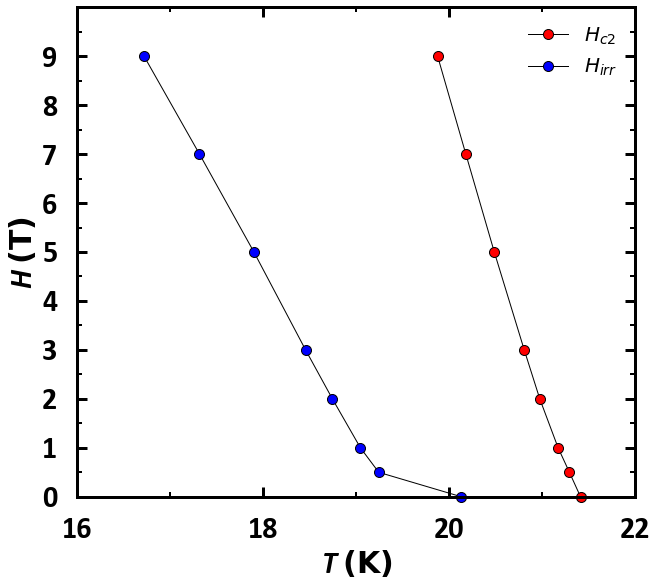

In [58]:
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
f_Calibri = FontProperties(fname=r'C:\WINDOWS\Fonts\Calibri.ttf')

#色設定
col = ['red', 'blue', 'yellow', 'green', 'pink', 'gray', 'black', 'orange']

#凡例
labels = ['0', '5000 (Oe)', '10000', '20000', '30000', '50000', '70000', '90000']

#画像の名前
def data_name(path):
    namepath = path.split('.')
    name = namepath[len(namepath)-2].split('/')
    return 'PPMS_Result/'+name[len(name)-1]+'.png'

#グラフ作成
fig = plt.figure(figsize = (10, 10))
fig.patch.set_edgecolor('k')
fig.subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(111)


#グラフの詳細設定
fig.subplots_adjust(bottom=0.2)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(1)
ax1.grid(color = 'black', linestyle = '--', linewidth = 0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis = 'both', which = "major", direction = 'in', width = 3, length = 10, pad = 20)
ax1.tick_params(axis = 'both', which = "minor", direction = 'in', width = 2, length = 5)
ax1.minorticks_on()

#x軸の主目盛りの設定
ax1.set_xlim(16, 22)
ax1.set_xticks(np.arange(16, 23, 2))
ax1.set_xticklabels(np.arange(16, 23, 2), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_xlabel(xlabel = 'T '+r'${\mathbf{(K)}}$', fontproperties = f_Calibriz, fontsize = 30)

#x軸の補助目盛りの設定
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#y軸の目盛りの設定
ax1.set_ylim(0, 100000)
ax1.set_yticks(np.arange(0, 100000, 10000))
ax1.set_yticklabels(np.arange(0, 10, 1), fontproperties = f_Calibrib, fontsize = 30)
ax1.set_ylabel(ylabel = 'H '+'$\mathbf{(T)}$', fontproperties = f_Calibriz, fontsize = 30)

#y軸の補助目盛りの設定
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5000))

#プロット
ax1.plot(df_Hc2['Temperature (K)'], df_Hc2["Magnetic Field (Oe)"], color = 'k', label = '$H_{c2}$', marker = '.', markersize = '20', markerfacecolor = 'red', linewidth = 1, clip_on = False)
ax1.plot(df_Hirr['Temperature (K)'],df_Hirr["Magnetic Field (Oe)"], color = 'k', label = '$H_{irr}$', marker = '.', markersize = '20', markerfacecolor = 'blue', linewidth = 1, clip_on = False)
    
#タイトル
ax1.set_title(label = '', fontsize = 40, pad = 20, fontproperties = f_Calibri)

#凡例
ax1.legend(prop={'size':20,'fname':r'C:\WINDOWS\Fonts\Calibri.ttf'}, frameon = False,)

plt.show()

figname = data_name(path)

fig.savefig("PPMS_Result/Hirr_Hc2.png", format = 'png', dpi = 300, transparent=True, bbox_inches='tight', facecolor = 'white')